In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
ts = pd.read_excel('Gas_CPD.xlsx', sheet_name='Sheet1', parse_dates=['Date'], index_col='Date')
ts

,Price
Date,
2019-01-02,3.25
2019-01-03,2.72
2019-01-04,2.80
2019-01-07,2.74
2019-01-08,2.89
...,...
2025-12-23,3.38
2025-12-24,3.31
2025-12-29,4.35


Text(0, 0.5, 'Price dollars per million BTU')

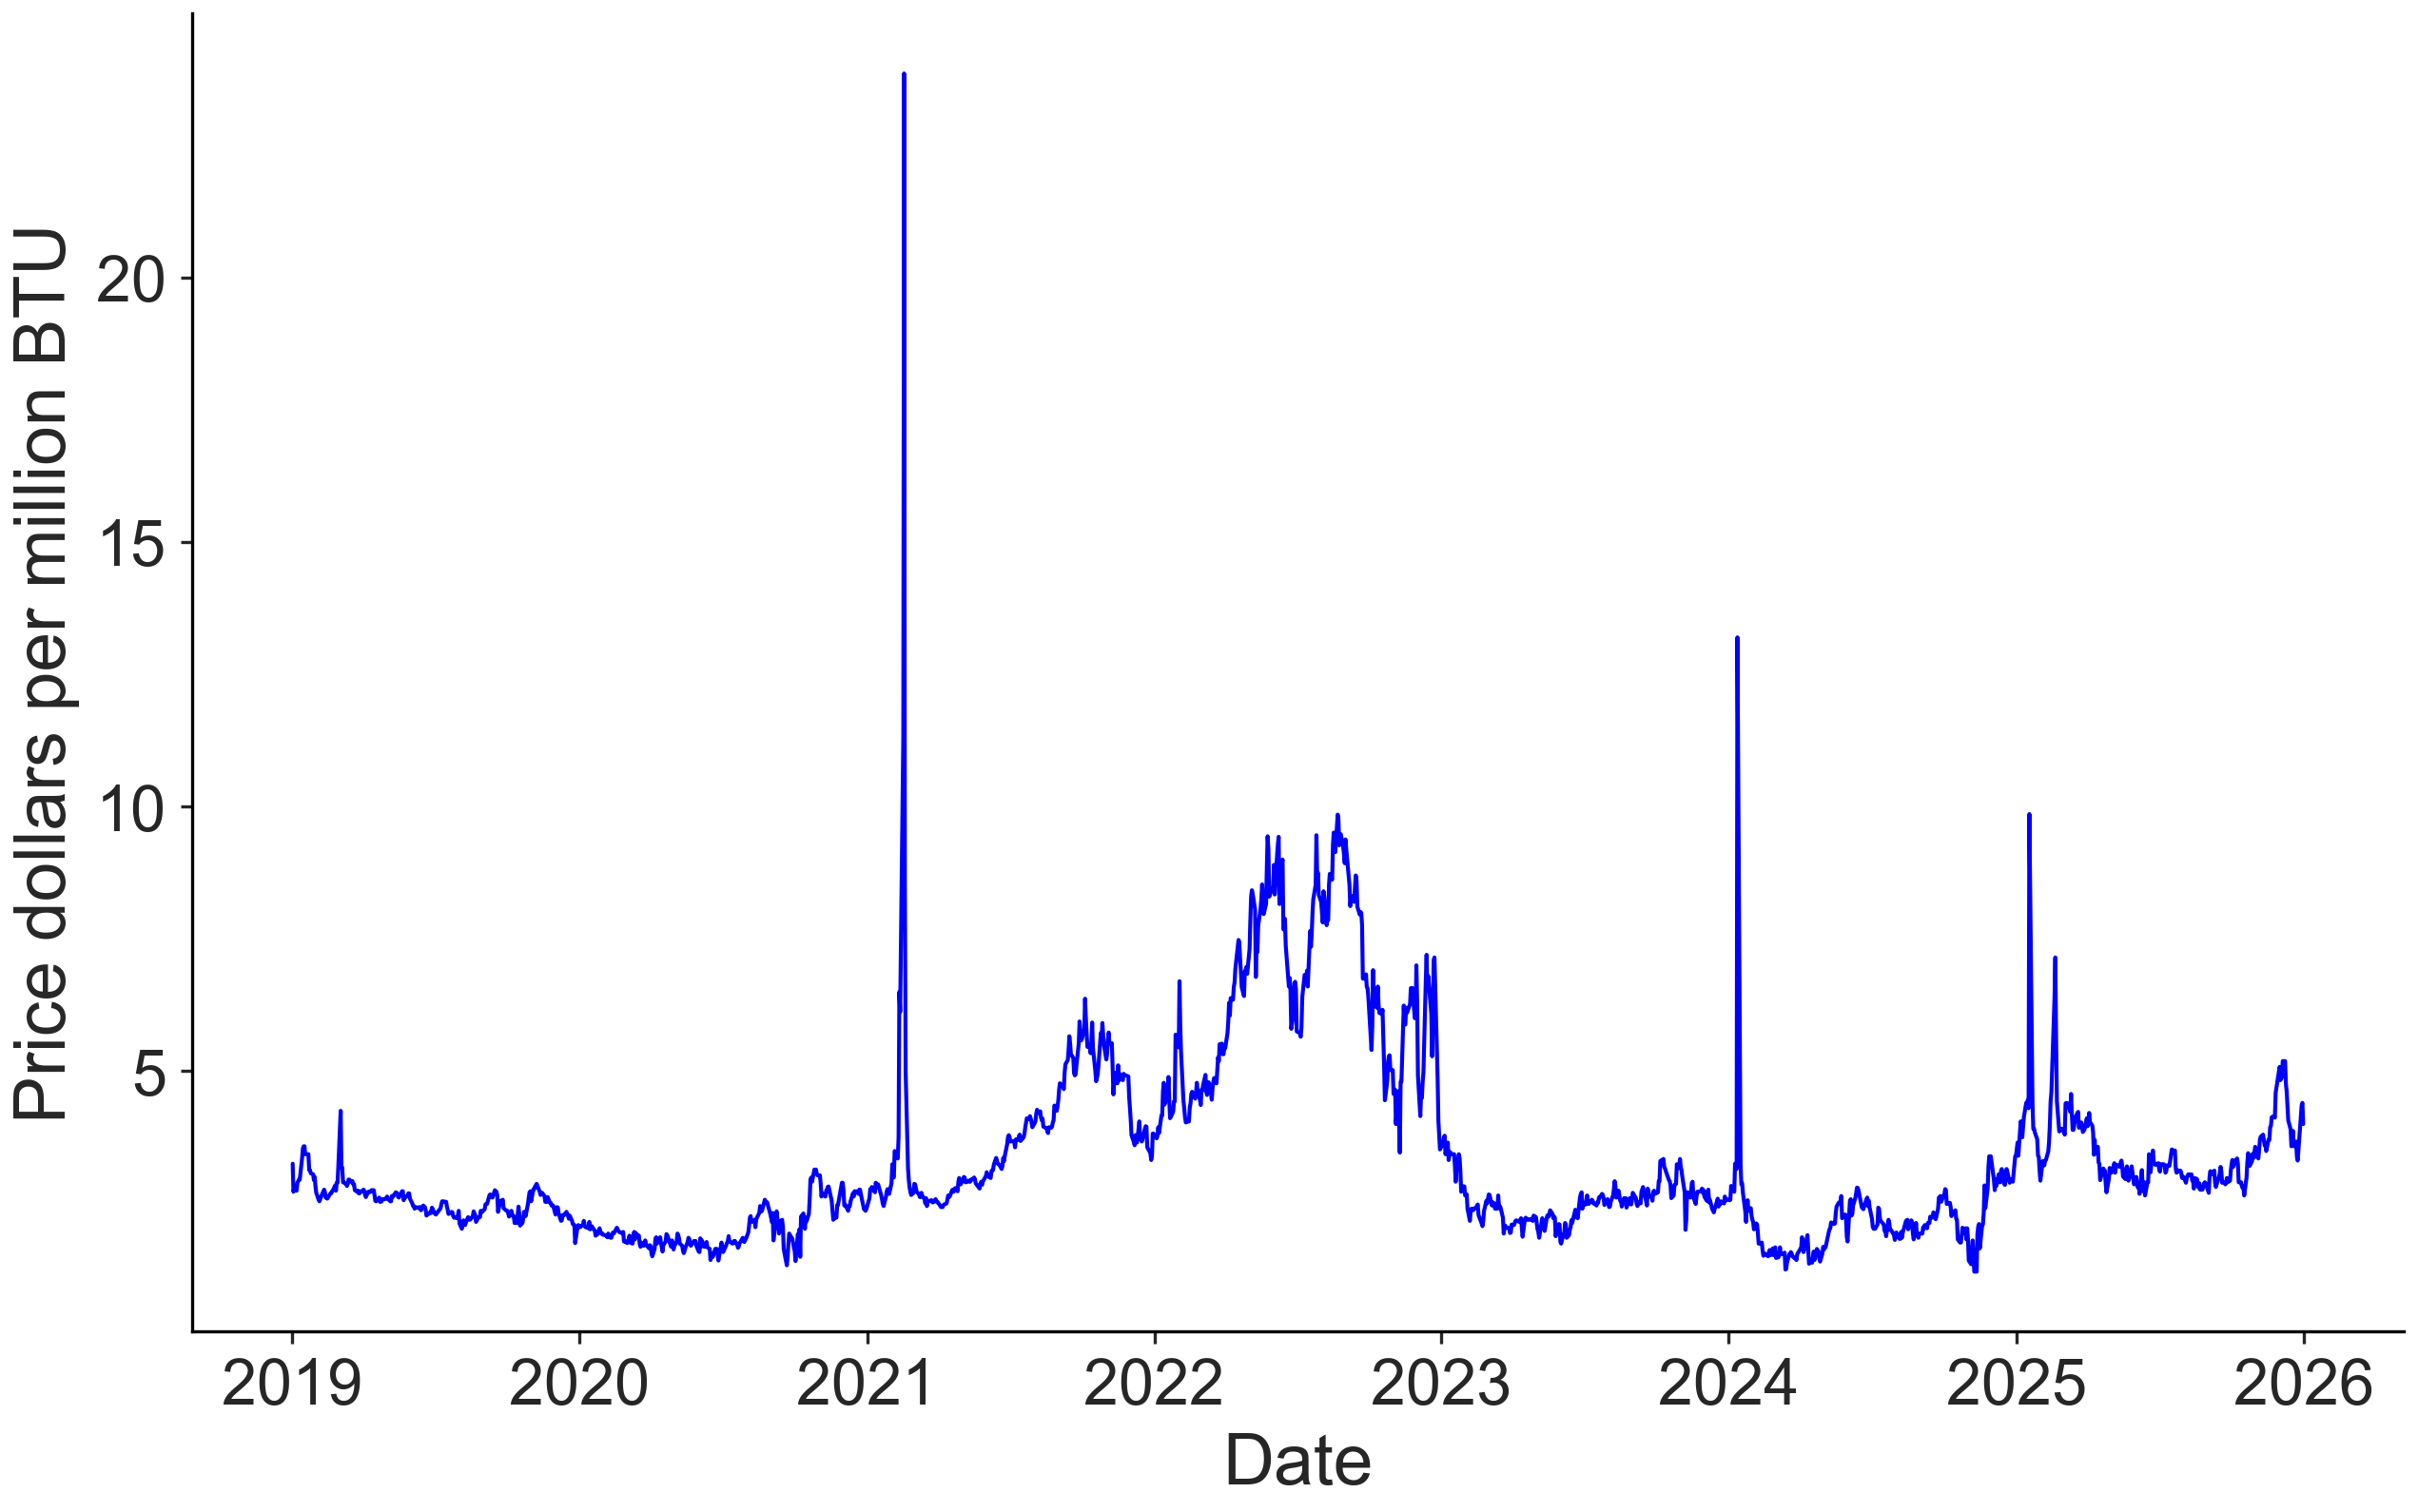

In [14]:
from plot_style import set_publication_style
set_publication_style()
#plot time series
plt.figure(figsize=(10,6))
plt.plot(ts.index, ts['Price'], label='Gas CPD', color='blue')
plt.xlabel('Date')
plt.ylabel('Price dollars per million BTU')

In [15]:
from RobustCPD import RobustCPD

detector = RobustCPD(trimming=0.01, alpha=0.01)

# 3. fit the model
results = detector.fit(ts['Price'].values,poly_order=2)
detector.summary()

Scanning 1226 candidate dates (Polynomial Order: 2)...
ROBUST STRUCTURAL BREAK DETECTED
Estimated Break Date     : 855
Slope Change (Beta2)     : -0.0370
T-Statistic              : -97.6448
----------------------------------------
>> CONCLUSION: SIGNIFICANT BREAK DETECTED


In [16]:
ts.iloc[results['break_index']]

Price    8.46
Name: 2022-05-31 00:00:00, dtype: float64

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 1. Initialize with NaN (so buffer zones don't plot as zero)
ts['t_stats'] = np.nan 

# 2. Extract results
indices = results['sequence_taus']
t_values = np.abs(results['sequence_beta2_tstats']) # Ensure absolute values

# 3. Fill the specific positions
# We use a temporary numpy array to handle the assignment by integer index
temp_stats = np.full(len(ts), np.nan)
temp_stats[indices] = t_values
ts['t_stats'] = temp_stats

# 4. Identify the Break Date for plotting
break_date = ts.index[results['break_index']]
break_tstat = results['beta2_t_stat']




In [18]:
ts

,Price,t_stats
Date,,
2019-01-02,3.25,NaN
2019-01-03,2.72,NaN
2019-01-04,2.80,NaN
2019-01-07,2.74,NaN
2019-01-08,2.89,NaN
...,...,...
2025-12-23,3.38,NaN
2025-12-24,3.31,NaN
2025-12-29,4.35,NaN


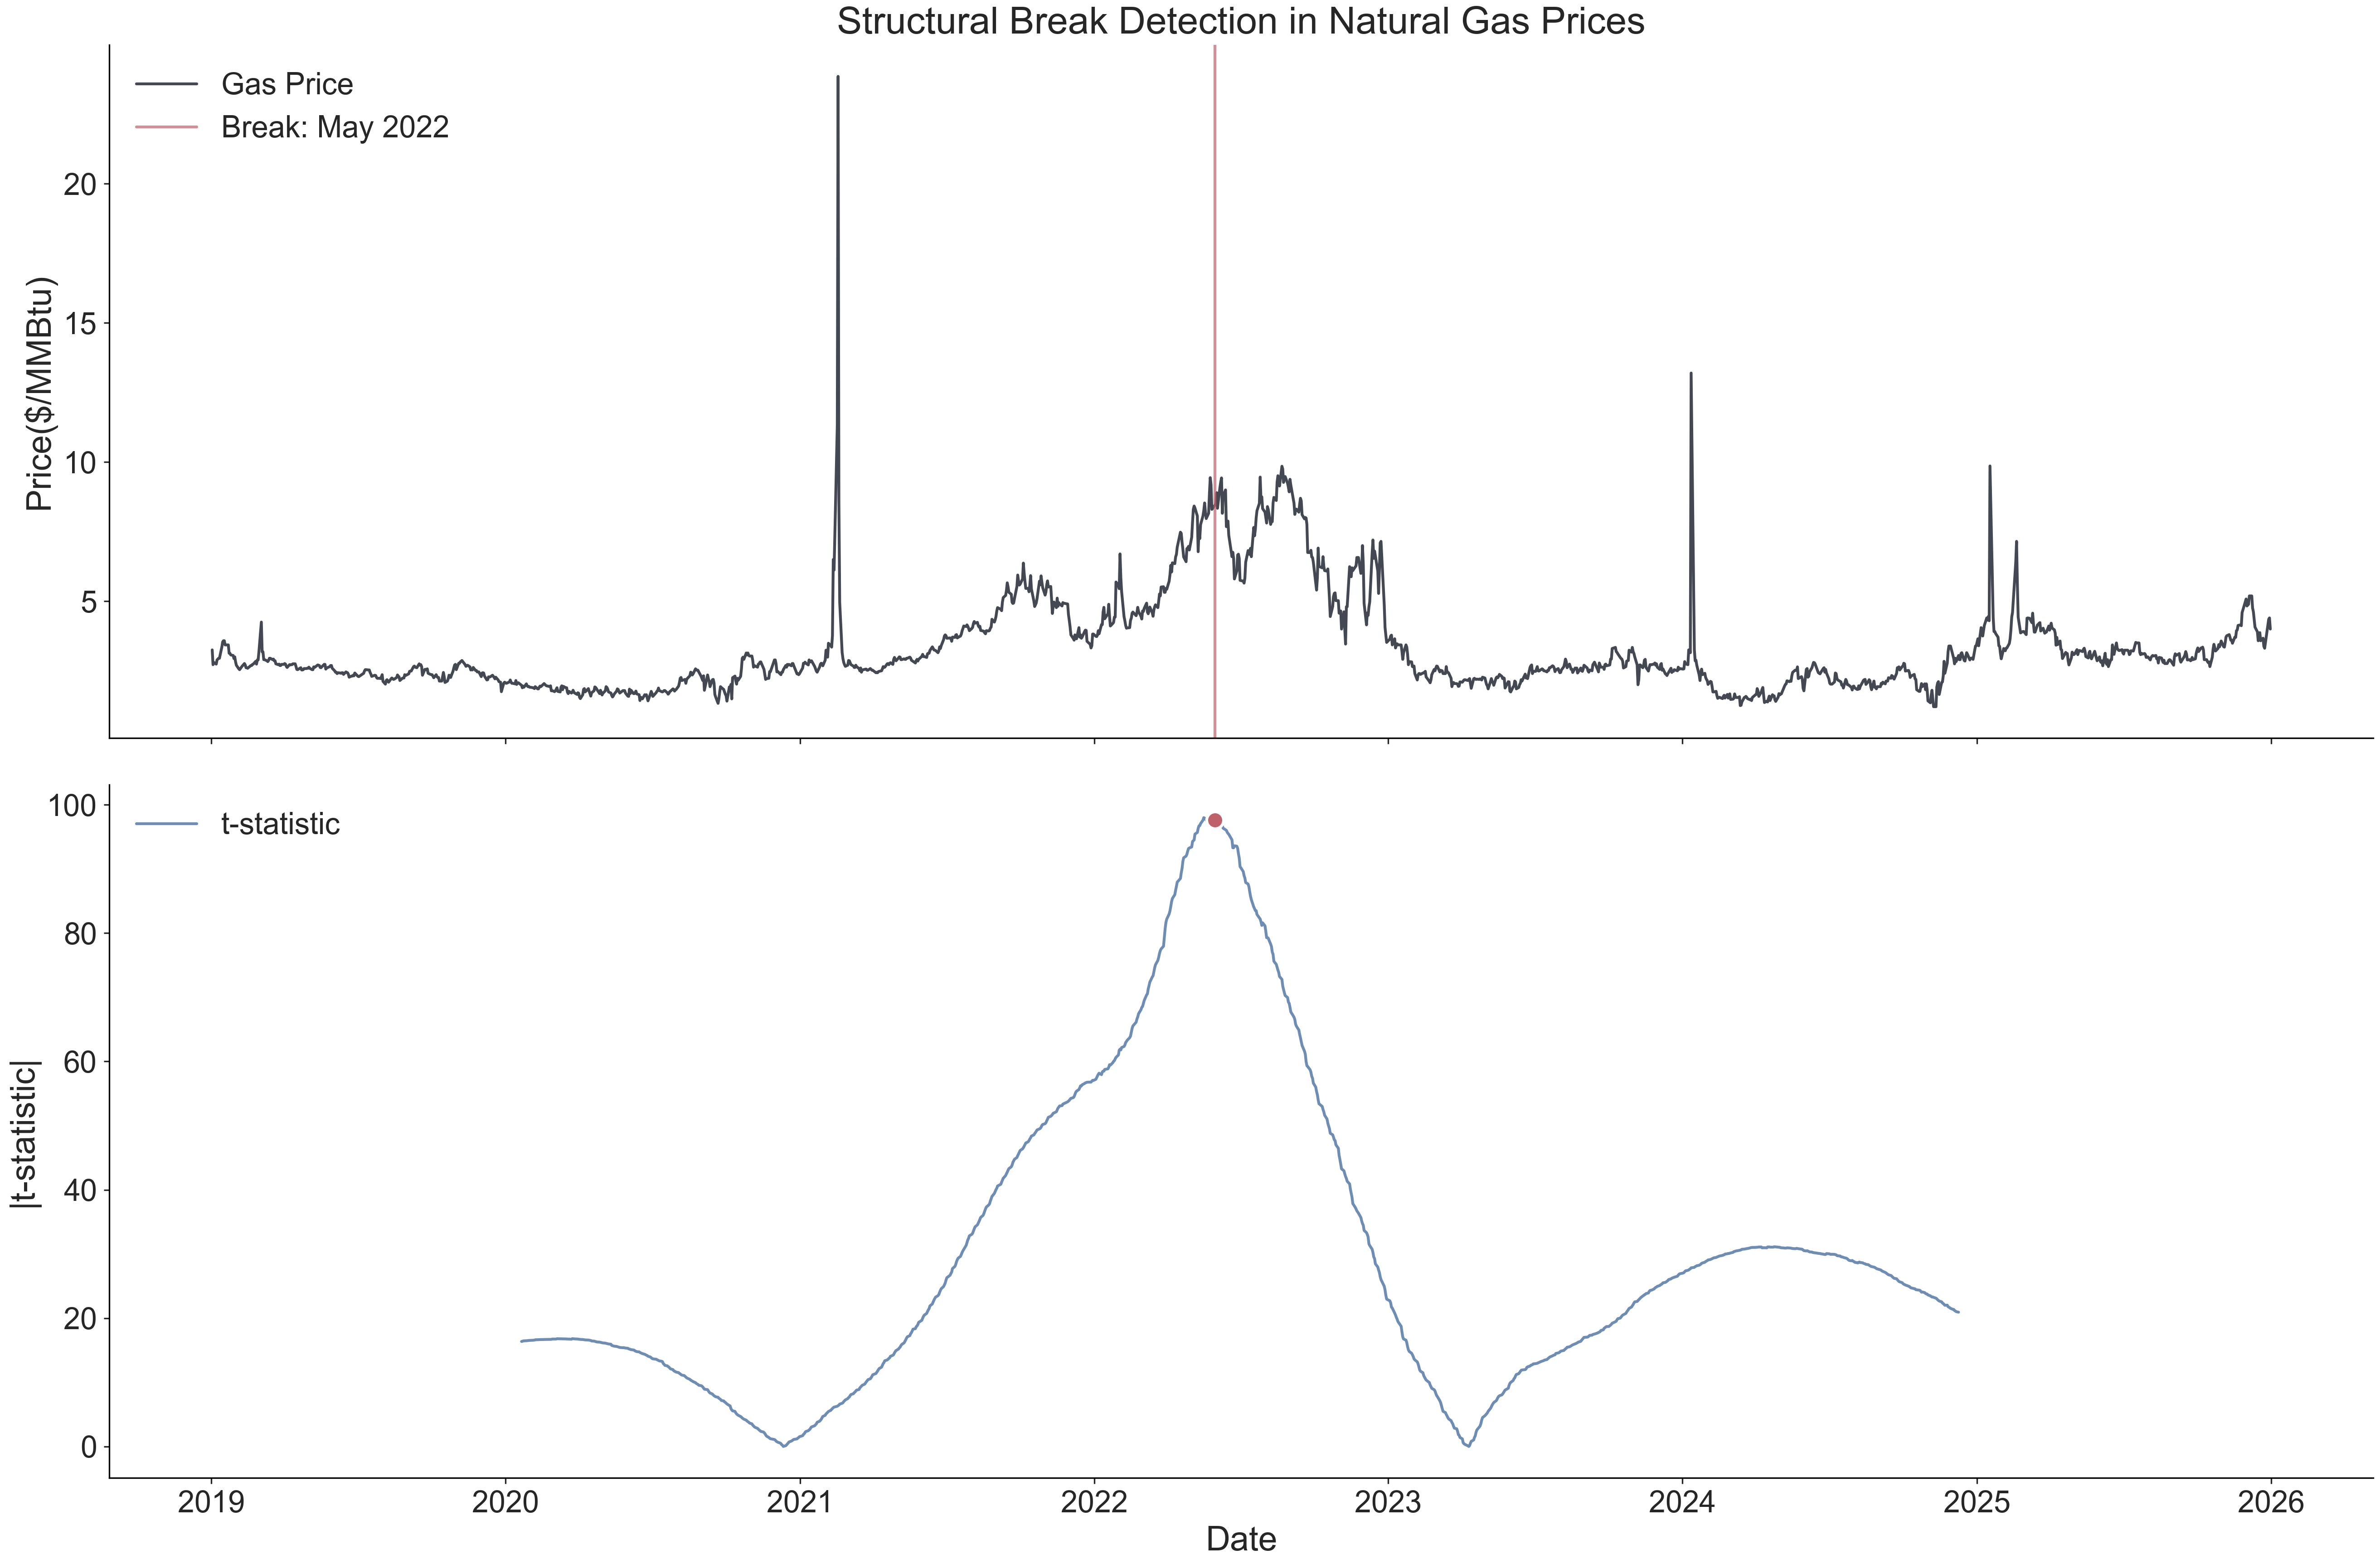

In [20]:
# Create two subplots sharing the X-axis (Dates)
from plot_style import set_publication_style
set_publication_style()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 12),sharex=True)

# Modern color palette
color_primary = '#2E3440'
color_accent = '#BF616A'
color_secondary = '#5E81AC'
color_neutral = '#D8DEE9'

# ================= TOP PANEL: PRICE SERIES =================
ax1.plot(ts.index, ts['Price'], color=color_primary, linewidth=1.5, 
         label='Gas Price', alpha=0.9)

# Add Vertical Line at the Detected Break Date
ax1.axvline(x=break_date, color=color_accent, linestyle='-', 
            linewidth=1.5, alpha=0.7, label=f'Break: May 2022')


# Cleaner title and labels
ax1.set_title('Structural Break Detection in Natural Gas Prices')
ax1.set_ylabel('Price($/MMBtu)')
#make the ticks larger and more visible

ax1.legend(loc='upper left', frameon=False)
ax1.grid(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# ================= BOTTOM PANEL: T-STATISTICS =================
ax2.plot(ts.index, ts['t_stats'], color=color_secondary, linewidth=1.5, 
         label='t-statistic', alpha=0.9)


# Highlight the peak
ax2.scatter([break_date], [abs(break_tstat)], color=color_accent, 
            s=80, zorder=5, edgecolors='white', linewidths=1.5)

ax2.set_ylabel('|t-statistic|')
ax2.set_xlabel('Date')
ax2.legend(loc='upper left', frameon=False)
ax2.grid(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# ================= FORMATTING =================
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax2.xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()